# Dataset Arbolado Espacios Verdes

Para este trabajo y dado el dataset elegido, que nos muestra las caracterísictas de cada arbol existente en la Ciudad de Buenos Aires, decidimos aplicar un modelo de regresión que nos permitiera, a partir de saber el diámetro y el grado de inclinación de un especimen, inferir la altura del mismo.

## Montaje Google Drive e importación de librerías

###Montaje de Google Drive

In [ ]:
"""
Ubicación del archivo
https://data.buenosaires.gob.ar/dataset/arbolado-espacios-verdes
"""
# Conectar Drive a Colab
from google.colab import drive
import os

# Montar drive
drive.mount("/content/drive/")
# Cambiar directorio
os.chdir('/content/drive/MyDrive/Grupo_4_Estadisitca_y_Probabilidad/Entrega_2/Data/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###Importación de librerias y carga de DF

In [ ]:
import pandas as pd
from tqdm.auto import tqdm

from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Preparación de los datos para la regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from statsmodels.api import OLS, add_constant
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

import warnings
from scipy.stats import shapiro
from scipy.stats import anderson
from statsmodels.stats.diagnostic import lilliefors

df = pd.read_csv('arbolado-en-espacios-verdes.csv')

### EDA: Análisis exploratorio de datos

In [ ]:
# Verificamos la carga y formato del Dataframe.
df.head()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,-58.477564,-34.645015,1,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.305719,98253.300738
1,-58.477559,-34.645047,2,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.751564,98249.733979
2,-58.477551,-34.645091,3,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98693.494639,98244.829684
3,-58.478129,-34.644567,4,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98640.439091,98302.938142
4,-58.478121,-34.644598,5,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98641.182166,98299.519997


La tabla muestra las primeras filas del conjunto de datos arbolado-en-espacios-verdes.csv, que incluye información sobre árboles como su ubicación (longitud y latitud), identificación, altura total, diámetro, inclinación, especie, nombre común y científico, tipo de follaje, espacio verde donde se encuentra, ubicación, familia y género del árbol, origen y coordenadas cartesianas (X, Y).

In [ ]:
# Verificamos los tipos de los campos que forman el dataframe.
df.dtypes

long          float64
lat           float64
id_arbol        int64
altura_tot      int64
diametro        int64
inclinacio      int64
id_especie      int64
nombre_com     object
nombre_cie     object
tipo_folla     object
espacio_ve     object
ubicacion      object
nombre_fam     object
nombre_gen     object
origen         object
coord_x       float64
coord_y       float64
dtype: object

In [ ]:
# Obtenemos las variables estadísticas más comunes para cada variable de formato numéricos.
df.describe()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,coord_x,coord_y
count,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000
mean,-58.439558,-34.606839,25866.623296,12.167100,39.395616,3.472215,112.769504,102177.845378,102487.232275
std,0.044614,0.042900,14936.773619,7.640309,31.171205,7.039495,162.693940,4092.013488,4759.012618
min,-58.529743,-34.697716,1.000000,0.000000,1.000000,0.000000,1.000000,93908.249224,92406.931681
25%,-58.471941,-34.642570,12927.250000,6.000000,18.000000,0.000000,11.000000,99207.890607,98523.875134
50%,-58.441735,-34.608041,25870.500000,11.000000,32.000000,0.000000,38.000000,101977.701395,102352.136672
75%,-58.409357,-34.570255,38800.750000,18.000000,54.000000,5.000000,208.000000,104948.266310,106545.694405
max,-58.353746,-34.527167,51729.000000,54.000000,500.000000,90.000000,999.000000,110046.627207,111326.573930


El resumen estadístico proporciona información sobre la distribución de los datos numéricos, como la longitud, latitud, identificación del árbol, altura total, diámetro, inclinación y coordenadas. Por ejemplo, la altura total promedio de los árboles es de aproximadamente 12.17 metros y el diámetro promedio es de unos 39.40 cm.

In [ ]:
# Preparación de los datos
# Verificar valores nulos

# Verificar valores nulos
null_values = df.isnull().sum()
print(null_values)

# Seleccionar variables cuantitativas
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Lista de Variables Numéricas:  ' + str(quantitative_vars))

long            0
lat             0
id_arbol        0
altura_tot      0
diametro        0
inclinacio      0
id_especie      0
nombre_com      0
nombre_cie      0
tipo_folla      0
espacio_ve      0
ubicacion     973
nombre_fam      0
nombre_gen      0
origen          0
coord_x         0
coord_y         0
dtype: int64
Lista de Variables Numéricas:  ['long', 'lat', 'id_arbol', 'altura_tot', 'diametro', 'inclinacio', 'id_especie', 'coord_x', 'coord_y']


In [ ]:
# Corrección de valores nulos en el campo "Ubicación".  Se define una categoría "Indeterminada" para ellos.
# Manejar los valores nulos en la columna 'ubicacion'
df['ubicacion'].fillna('Indeterminada', inplace=True)

# Verificar si se han manejado todos los valores nulos
nulos_update = df.isnull().sum()
print(nulos_update)

long          0
lat           0
id_arbol      0
altura_tot    0
diametro      0
inclinacio    0
id_especie    0
nombre_com    0
nombre_cie    0
tipo_folla    0
espacio_ve    0
ubicacion     0
nombre_fam    0
nombre_gen    0
origen        0
coord_x       0
coord_y       0
dtype: int64


### Análisis Estadísitico Descriptivo de las variables.

In [ ]:
# Selecciona las columnas numéricas para el análisis de correlación
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Calcula la matriz de correlación de Pearson
matriz_correlacion = df[columnas_numericas].corr()

# Imprime la matriz de correlación
print("Matriz de correlación de Pearson:")
print(matriz_correlacion)

# Imprimi las correlaciones individuales con la altura_tot
print("\nCorrelaciones con la altura_tot:")
for columna in columnas_numericas:
    correlacion, _ = pearsonr(df[columna], df['altura_tot'])
    print(f"{columna}: {correlacion}")



Matriz de correlación de Pearson:
                long       lat  id_arbol  altura_tot  diametro  inclinacio  \
long        1.000000  0.081786  0.031531    0.015638  0.019927    0.023328   
lat         0.081786  1.000000  0.025004   -0.012759  0.075168    0.131388   
id_arbol    0.031531  0.025004  1.000000   -0.026216  0.003340    0.013623   
altura_tot  0.015638 -0.012759 -0.026216    1.000000  0.581563   -0.008836   
diametro    0.019927  0.075168  0.003340    0.581563  1.000000    0.024201   
inclinacio  0.023328  0.131388  0.013623   -0.008836  0.024201    1.000000   
id_especie -0.003951 -0.068594 -0.068311    0.013130 -0.048741   -0.025016   
coord_x     1.000000  0.081868  0.031535    0.015666  0.019964    0.023351   
coord_y     0.081561  1.000000  0.025008   -0.012740  0.075178    0.131392   

            id_especie   coord_x   coord_y  
long         -0.003951  1.000000  0.081561  
lat          -0.068594  0.081868  1.000000  
id_arbol     -0.068311  0.031535  0.025008  
altur

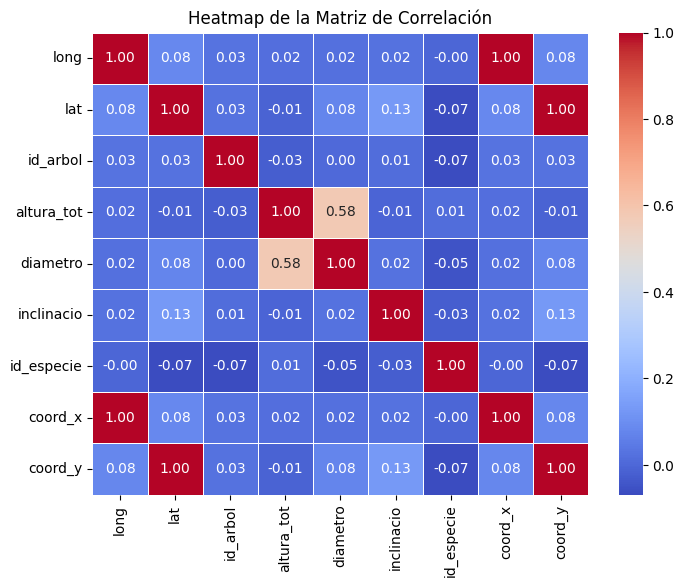

In [ ]:
# Graficamos el Heatmap de la Matriz de Correlación.
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [ ]:
# Calcular el coeficiente de correlación y el p-valor
pearson_corr, p_value = pearsonr(df['diametro'], df['altura_tot'])
pearson_corr2, p_value2 = pearsonr(df['inclinacio'], df['diametro'])

# Mostrar los resultados
print(f'Coeficiente de correlación de Pearson entre diametro y altura: {pearson_corr:.3f}')
print(f'P-valor: {p_value:.10f}')

print(f'Coeficiente de correlación de Pearson entre diametro e inclinacion: {pearson_corr2:.3f}')
print(f'P-valor: {p_value2:.10f}')

Coeficiente de correlación de Pearson entre diametro y altura: 0.582
P-valor: 0.0000000000
Coeficiente de correlación de Pearson entre diametro e inclinacion: 0.024
P-valor: 0.0000000395


Podemos observar una correlación positiva entre el diámetro y la altura de los especímenes, como así también entre el diámetro y la inclinación.

###Gráfico de distribución de variables numéricas

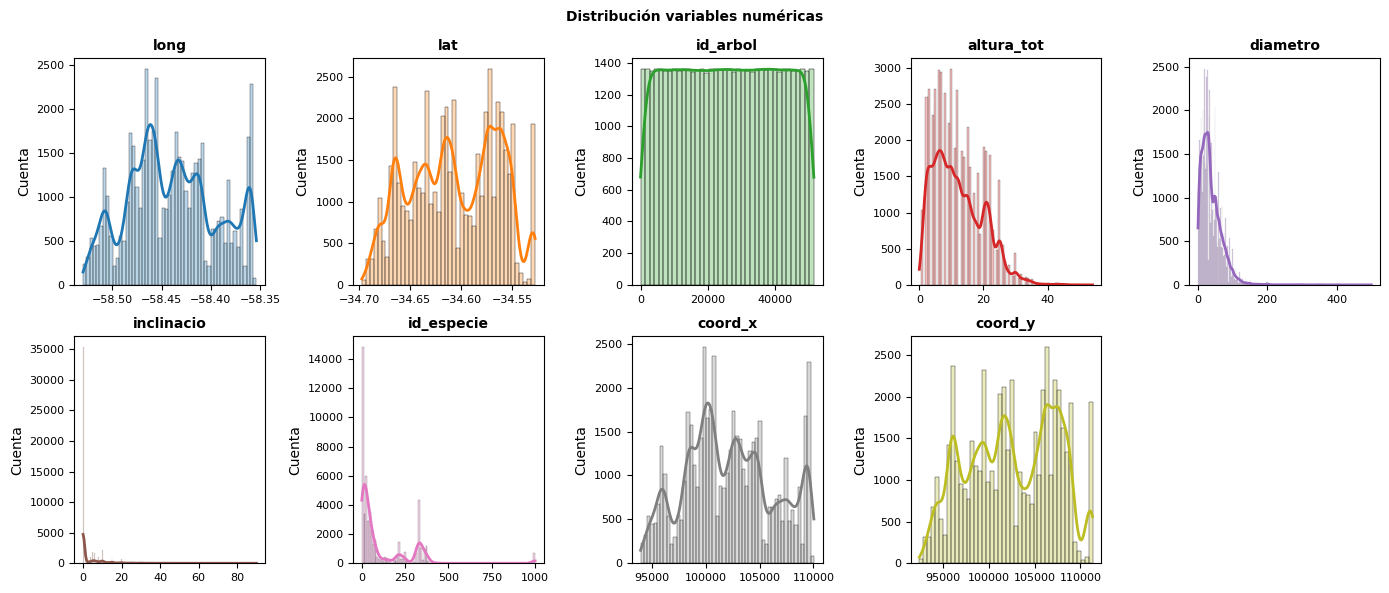

In [ ]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6)) ## Ajuste del nro de splots
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64','int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Cuenta")

fig.delaxes(axes[9])  ##Borrado de lo que sobra

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### Gráficos relacionados con algunas variables cualitativas

####  Variable Origen
Esta variable, clasifica a las especies en Nativa (Autóctona), Exótica (No Nativa) o sin determinar. Para la representación gráfica, que se verá a continuación, hemos optado por omitir los especímenes cuyo origen no ha sido determinado. Esta decisión se tomó con el fin de presentar de manera más clara y enfocada la distribución entre las categorías Nativa y Exótica, evitando cualquier distorsión que pudiera surgir al incluir aquellos sin clasificación.

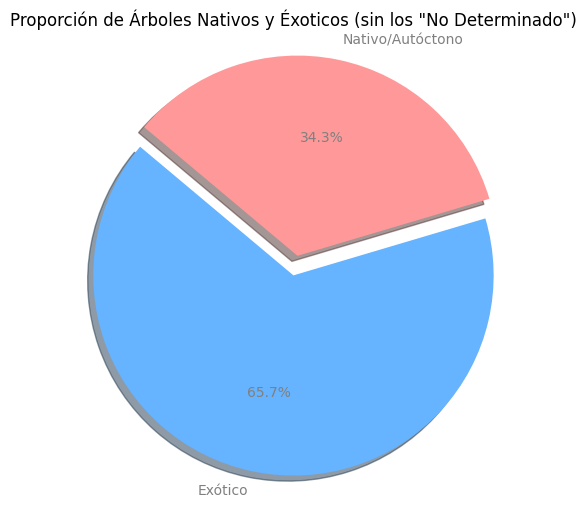

In [ ]:
# Obtener los datos del conjunto de datos almacenado en el Dataframe 'df'
origen_counts = df['origen'].value_counts()

# Filtrar la categoría 'No Determinado'
origen_counts = origen_counts[origen_counts.index != 'No Determinado']

labels = origen_counts.index
sizes = origen_counts.values
colors = ['#66b3ff', '#ff9999']  # Colores personalizados
#explode = (0.1, 0.1, 0)  # Explotar el primer segmento
explode = (0.1, 0)  # Explotar el primer segmento

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'color': 'grey'}, shadow=True, startangle=140)
plt.axis('equal')  # Gráfico sea circular

# Título centrado
plt.title('Proporción de Árboles Nativos y Éxoticos (sin los "No Determinado")', loc='center')
plt.show()


#### Variable Especie
(Basada en el nombre común)

Para esta variable, obtuvimos el TOP 10 de Especies más Comúnes.  Y ordenamos los datos en un gráfico de Barras, tomando las 10 para las cuales se encuentran más especímenes.

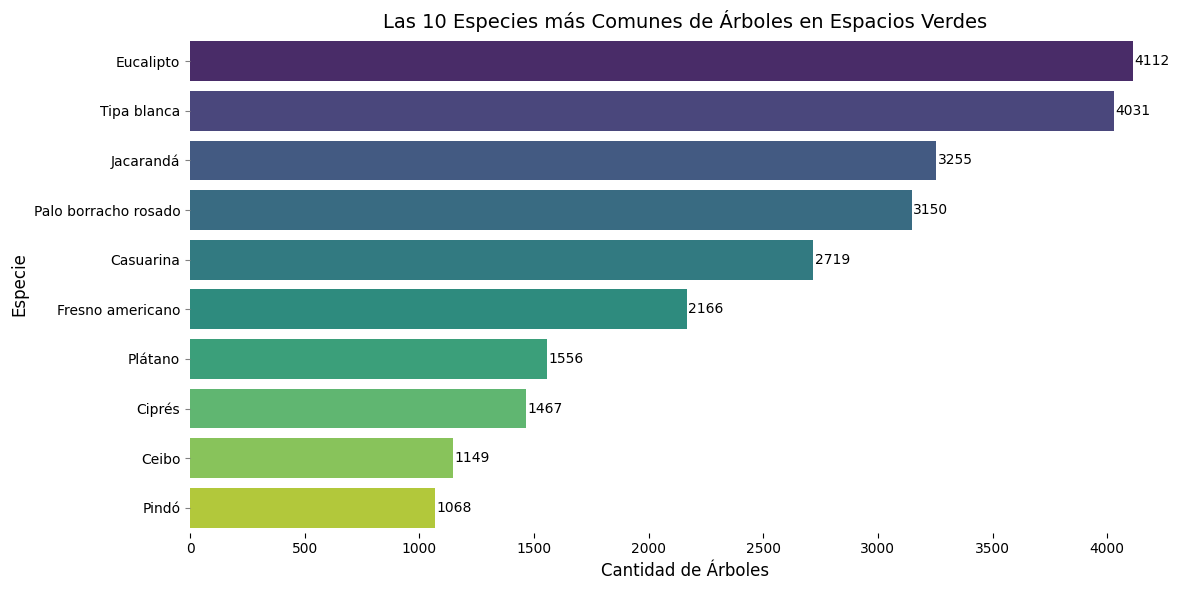

In [ ]:
# Obtener las 10 especies más comunes
top_10_especies = df['nombre_com'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_especies.values, y=top_10_especies.index, palette='viridis')

# Eliminar bordes y personalizar ejes
sns.despine(left=True, bottom=True)
plt.gca().tick_params(axis='y', color='0.5', grid_color='grey')

# Etiquetas de ejes y título
plt.xlabel('Cantidad de Árboles', fontsize=12)
plt.ylabel('Especie', fontsize=12)
plt.title('Las 10 Especies más Comunes de Árboles en Espacios Verdes', fontsize=14)

# Mostrar valores en las barras
for i, v in enumerate(top_10_especies.values):
    plt.text(v + 5, i, str(v), va='center', fontsize=10, color='black')

plt.tight_layout()  # Evita que se recorten las etiquetas
plt.show()

### Preparación y definición del modelo de Regresión

Tras analizar previamente la presencia de una correlación positiva entre el diámetro y la altura, así como entre la inclinación y el diámetro de los árboles en nuestro conjunto de datos, nuestro objetivo principal fue entrenar un modelo de regresión que tenga la capacidad de predecir la altura de los especímenes basándose en sus diámetros e inclinaciones proporcionados.

In [ ]:
# Seleccionar las columnas relevantes y eliminar filas con valores nulos
relevant_columns = ['altura_tot', 'diametro', 'inclinacio']
df_clean = df.dropna(subset=relevant_columns)

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_clean[['diametro', 'inclinacio']]
y = df_clean['altura_tot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el R^2 y el error cuadrático medio
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Preparar los datos para el análisis de residuos
residuals = y_test - y_pred

# Mostrar los resultados preliminares
print('R^2:', r2)
print('MSE:', mse)

# Ajustar un modelo OLS para obtener estadísticas detalladas
X_train_const = add_constant(X_train)
ols_model = OLS(y_train, X_train_const).fit()
print ('Sumario del modelo OLS utilizado')
print(ols_model.summary())

R^2: 0.32402805901553355
MSE: 38.81319410327433
Sumario del modelo OLS utilizado
                            OLS Regression Results                            
Dep. Variable:             altura_tot   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.072e+04
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:57:24   Log-Likelihood:            -1.3369e+05
No. Observations:               41201   AIC:                         2.674e+05
Df Residuals:                   41198   BIC:                         2.674e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

El valor de ( R^2 ) es aproximadamente 0.324, lo que indica que alrededor del 32.4% de la variabilidad en la altura total del árbol se puede explicar por el diámetro y la inclinación.
El error cuadrático medio (MSE) es aproximadamente 38.81.

El resumen del modelo OLS proporciona estadísticas detalladas, incluyendo el valor de ( R^2 ) ajustado, la estadística F y los p-valores para cada coeficiente. Esto nos permitirá realizar pruebas de hipótesis para los coeficientes individuales y evaluar la significancia global del modelo.

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
ols_model.conf_int(alpha=0.05)

,0,1
const,6.463961,6.665236
diametro,0.141965,0.145817
inclinacio,-0.031548,-0.014427


In [ ]:
# Análisis de las variables estadísticas del modelo, sobre el lote de datos de entrenamiento.
predicciones = ols_model.get_prediction(exog = X_train_const).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
6274,10.017979,0.037179,9.945106,10.090851,-2.151986,22.187943
11028,7.140162,0.048477,7.045146,7.235178,-5.029955,19.310279
50627,9.154634,0.039894,9.076441,9.232826,-3.015364,21.324631
42242,11.888559,0.034170,11.821585,11.955534,-0.281371,24.058490


#### Gráfico Dispersión Modelo Entrenamiento

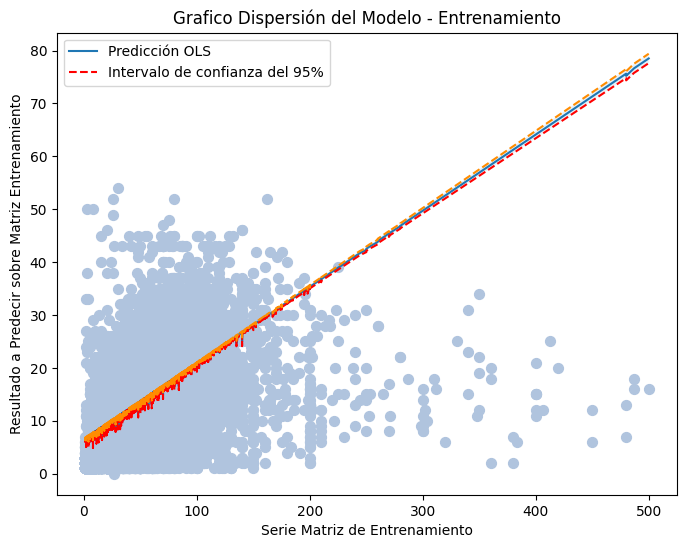

In [ ]:
# Predicciones con intervalo de confianza del 95%- Representacion grafica del modelo
# ==============================================================================
predicciones = ols_model.get_prediction(exog = X_train_const).summary_frame(alpha=0.05)
predicciones['x'] = X_train_const.iloc[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "lightsteelblue", s=50)
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="Predicción OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="Intervalo de confianza del 95%")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='darkorange')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)

ax.set_xlabel('Serie Matriz de Entrenamiento')
ax.set_ylabel('Resultado a Predecir sobre Matriz Entrenamiento')
ax.set_title('Grafico Dispersión del Modelo - Entrenamiento')
ax.legend() ;


#### Análisis residuos
(Gráficos)

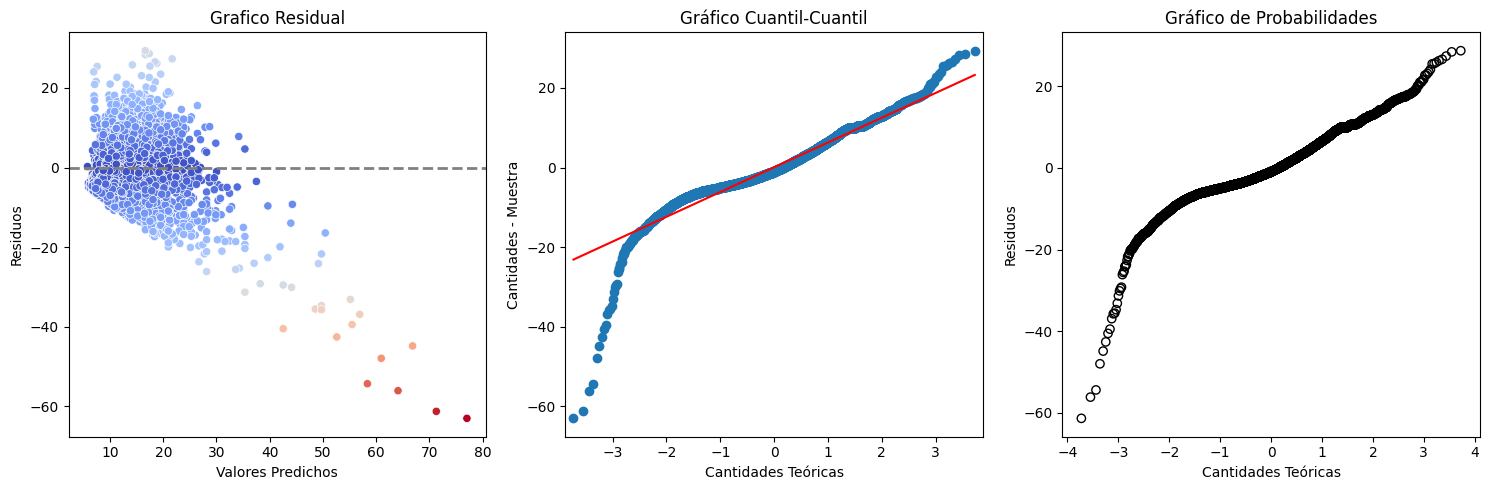

In [ ]:
# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Gráfico de residuos
# Calcular la magnitud de los residuos
residual_magnitude = abs(residuals)

palette = sns.color_palette("coolwarm", as_cmap=True)
sns.scatterplot(x=y_pred, y=residuals, hue=residual_magnitude, palette=palette, legend=False, ax=axes[0])
axes[0].axhline(y=0, color='gray', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores Predichos')
axes[0].set_ylabel('Residuos')
axes[0].set_title('Grafico Residual')

# Gráfico QQ
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Gráfico Cuantil-Cuantil')
axes[1].set_xlabel("Cantidades Teóricas")
axes[1].set_ylabel("Cantidades - Muestra")

# Gráfico de Probabilidad
sorted_residuals = np.sort(residuals)
probs = np.linspace(0, 1, len(residuals))
theoretical_quantiles = stats.norm.ppf(probs)
axes[2].scatter(theoretical_quantiles, sorted_residuals, edgecolors='k', facecolors='none')
axes[2].set_title('Gráfico de Probabilidades')
axes[2].set_xlabel('Cantidades Teóricas')
axes[2].set_ylabel('Residuos')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


El gráfico de residuos muestra la dispersión de los errores (residuos) en relación con los valores predichos. La línea roja representa la diferencia entre los valores observados y los valores predichos por el modelo.

#### Test de Normalidad
Shapiro, Anderson, Lilliefors y D'Agostino

In [ ]:
## Test normalidad SHAPIRO.
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    stat, p = shapiro(residuals)
print(f'Valor p de la prueba de normalidad de Shapiro: {p}')
print(f'Estadísitcas obtenidas con el Test Shapiro:  {stat}')

Valor p de la prueba de normalidad de Shapiro: 0.0
Estadísitcas obtenidas con el Test Shapiro:  0.9465316534042358


In [ ]:
## Test de ANDERSON. Mas adecuado para muestras grandes.
result = anderson(residuals)
print(f'Valor de estadística de la prueba de normalidad de Anderson-Darling: {result.statistic}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'A un nivel de significancia de {sl}, la hipótesis nula no puede ser rechazada.')
    else:
        print(f'A un nivel de significancia de {sl}, la hipótesis nula puede ser rechazada.')

Valor de estadística de la prueba de normalidad de Anderson-Darling: 115.14701968761437
A un nivel de significancia de 15.0, la hipótesis nula puede ser rechazada.
A un nivel de significancia de 10.0, la hipótesis nula puede ser rechazada.
A un nivel de significancia de 5.0, la hipótesis nula puede ser rechazada.
A un nivel de significancia de 2.5, la hipótesis nula puede ser rechazada.
A un nivel de significancia de 1.0, la hipótesis nula puede ser rechazada.


In [ ]:
## Test de LILLIEFORS.
stat, p = lilliefors(residuals)
print(f'Valor p de la prueba de normalidad de Lilliefors: {p}')
print(f'Estadísitcas obtenidas con el Test Lilliefors:  {stat}')


Valor p de la prueba de normalidad de Lilliefors: 0.0009999999999998899
Estadísitcas obtenidas con el Test Lilliefors:  0.07395482646911453


In [ ]:
# Normalidad de los residuos D'Agostino
# =============================================
k2, p_value = stats.normaltest(residuals)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1230.8487766796745, p-value = 5.303763073932446e-268


###Variables Independientes, Dependientes y Análisis de Residuos.

#### Dispersión entre Diámetro y Altura Total
Gráfica con línea de Regresión

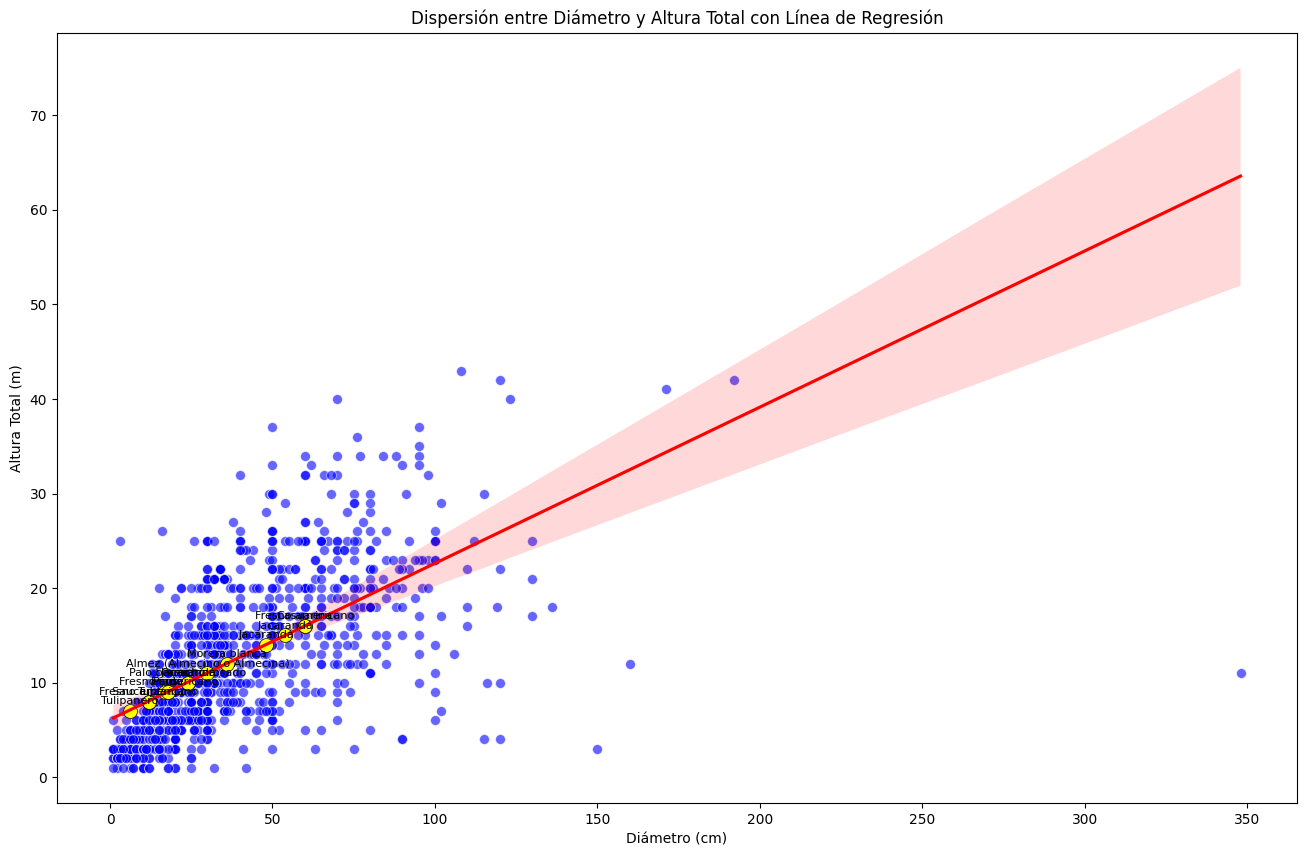

In [ ]:
# Tomar una muestra aleatoria de los datos
random_sample = df_clean.sample(min(1000, len(df_clean)))

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(16, 10))
scatter = sns.scatterplot(x='diametro', y='altura_tot', data=random_sample, s=50, alpha=0.6, color='blue')
reg_plot = sns.regplot(x='diametro', y='altura_tot', data=random_sample, scatter=False, line_kws={'color': 'red'})

plt.title('Dispersión entre Diámetro y Altura Total con Línea de Regresión')
plt.xlabel('Diámetro (cm)')
plt.ylabel('Altura Total (m)')

# Obtener las coordenadas de la línea de regresión
x_line = reg_plot.get_lines()[0].get_xdata()
y_line = reg_plot.get_lines()[0].get_ydata()

# Etiquetar puntos de datos con nombres solo para aquellos cerca de la línea de regresión
threshold_distance = 0.1

for i, (name, x, y) in enumerate(zip(random_sample['nombre_com'], random_sample['diametro'], random_sample['altura_tot'])):
    # Calcular la distancia vertical entre el punto y la línea de regresión
    distance_to_line = abs(y - np.interp(x, x_line, y_line))

    if distance_to_line < threshold_distance:
        # Personalizar el tamaño y el color de los puntos etiquetados
        plt.scatter(x, y, s=100, color='yellow', marker='o', edgecolors='black', linewidths=0.5)
        plt.annotate(name, (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.show()

####Relación entre Diámetro y Altura Total.
Gráfica con línea de Tendencia.

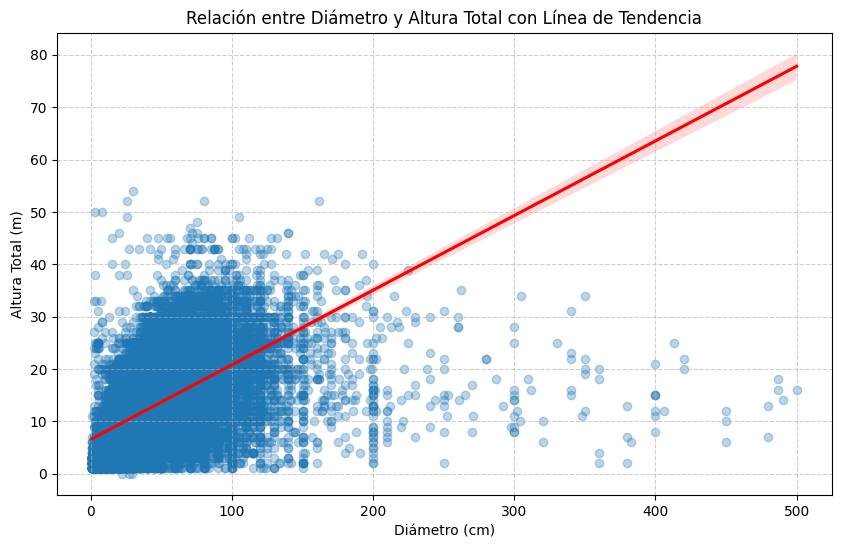

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot con regresión lineal
sns.regplot(x='diametro', y='altura_tot', data=df_clean, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

# Personalización del gráfico
plt.title('Relación entre Diámetro y Altura Total con Línea de Tendencia')
plt.xlabel('Diámetro (cm)')
plt.ylabel('Altura Total (m)')

# Añadir cuadrícula para una mejor referencia
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


#### Dispersión entre Inclinación y Altura Total.
Gráfica con línea de Regresión.

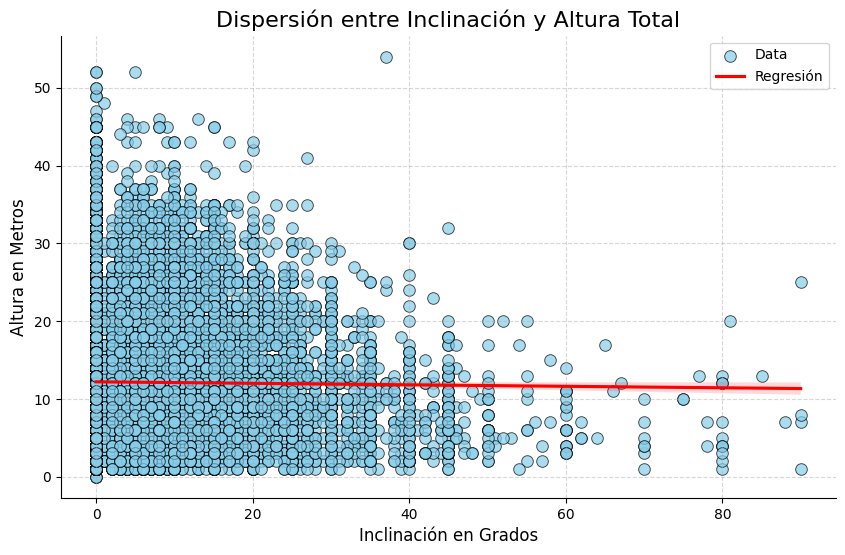

In [ ]:
# Gráfico de dispersión entre 'inclinacio' y 'altura_tot'
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(x='inclinacio', y='altura_tot', data=df_clean, alpha=0.7, color='skyblue', edgecolor='black', s=70, label='Data')
plt.title('Dispersión entre Inclinación y Altura Total', fontsize=16)
plt.xlabel('Inclinación (grados)', fontsize=12)
plt.ylabel('Altura Total (m)', fontsize=12)

# Añadir una línea de regresión
sns.regplot(x='inclinacio', y='altura_tot', data=df_clean, scatter=False, color='red', label='Regresión')

plt.grid(axis='both', linestyle='--', alpha=0.5)
sns.despine()

plt.xlabel("Inclinación en Grados")
plt.ylabel("Altura en Metros")
plt.legend()
plt.show()


####Relación entre Inclinación y Altura Total.

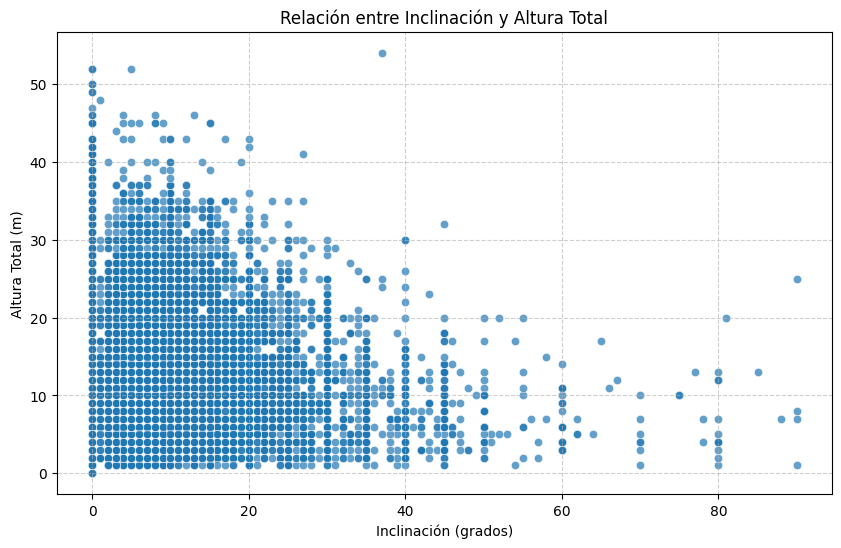

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='inclinacio', y='altura_tot', data=df_clean, alpha=0.7, edgecolor='w', linewidth=0.5)

# Personalización del gráfico
plt.title('Relación entre Inclinación y Altura Total')
plt.xlabel('Inclinación (grados)')
plt.ylabel('Altura Total (m)')

# Añadir cuadrícula para una mejor referencia
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


#### Histograma de los Residuos

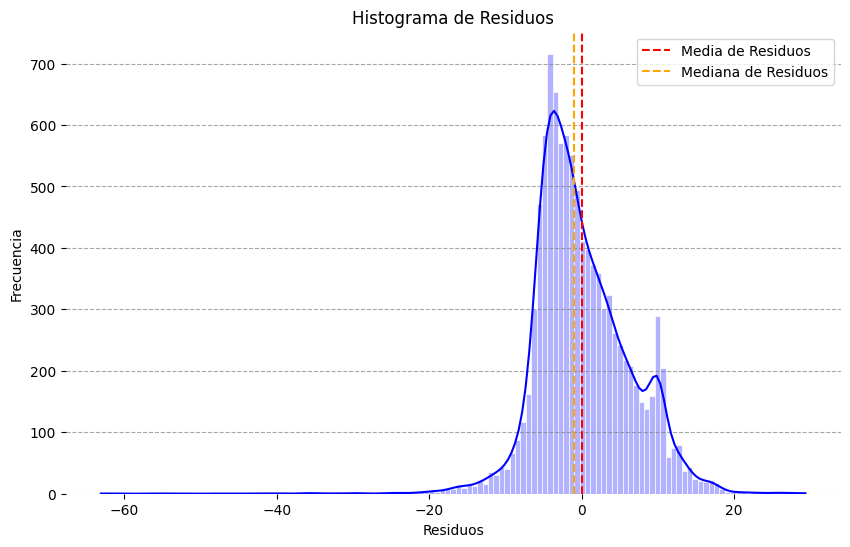

In [ ]:
# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='white', linewidth=0.5, alpha=0.30)
plt.axvline(x=0, color='red', linestyle='--', label='Media de Residuos')
plt.axvline(x=residuals.median(), color='orange', linestyle='--', label='Mediana de Residuos')

# Personalizar la apariencia de la grilla
plt.grid(axis='y', linestyle='--', alpha=0.7, color='grey')

# Eliminar el recuadro negro de los bordes
sns.despine(left=True, bottom=True)

plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Estos gráficos proporcionan una visualización de la relación entre las variables independientes (diámetro e inclinación) y la variable dependiente (altura total), así como la distribución de los errores del modelo.

### Coeficientes del Modelo de Regresión

In [ ]:
# Extracción de los coeficientes del modelo para escribir la ecuación de regresión lineal

# Obtener los coeficientes del modelo
coefficients = ols_model.params

# Ecuación del modelo
model_equation = 'Altura Total = {:.4f} + ({:.4f} * Diámetro) + ({:.4f} * Inclinación)'.format(coefficients['const'], coefficients['diametro'], coefficients['inclinacio'])

# Mostrar la ecuación del modelo corregida
print('Modelo de regresión lineal final corregido:')
print(model_equation)

Modelo de regresión lineal final corregido:
Altura Total = 6.5646 + (0.1439 * Diámetro) + (-0.0230 * Inclinación)


Altura Total = 6.5646 + (0.1439 * Diámetro) + (-0.023 * Inclinación)
La ecuación corregida del modelo de regresión lineal es la siguiente:
* La altura total de un árbol se estima como 6.5646 más 0.1439 veces el diámetro del árbol menos 0.023 veces la inclinación del árbol.

Estos coeficientes representan la contribución promedio de cada unidad de diámetro e inclinación a la altura total del árbol, respectivamente.

####Conclusión
La ecuación proporcionada es la fórmula general del modelo de regresión lineal que se ha creado a partir de los datos.

---

No es una ecuación con valores específicos para
'Diámetro' e 'Inclinación', sino una fórmula que describe cómo se relacionan estas variables con la 'Altura Total' de un árbol.

---

Para obtener valores específicos de 'Altura Total', necesitarías insertar valores específicos de 'Diámetro' e 'Inclinación' en la ecuación.

Por ejemplo, si tienes un árbol con un diámetro de 10 cm y una inclinación de 5 grados, podrías calcular su altura total estimada como sigue:

Altura Total = 6.5646 + (0.1439 * 10) + (-0.023 * 5)

Si necesitas calcular la altura total para un conjunto de árboles con diferentes diámetros e inclinaciones, tendrías que aplicar esta fórmula a cada árbol con sus respectivos valores de 'Diámetro' e 'Inclinación'.

#### Función para testear la Fórmula de Regresión proporcionada por el modelo

In [ ]:
# Función para calcular las alturas totales a partir de una lista de diámetros e inclinaciones

def calculo_alturas(diameters, inclinations, coefficients):

    # Calcula las alturas totales
    heights = [coeficientes['const'] + coeficientes['diametro'] * d + coeficientes['inclinacio'] * i for d, i in zip(diameters, inclinations)]
    return heights

# Coeficientes del modelo
coeficientes = {'const': 6.565, 'diametro': 0.144, 'inclinacio': -0.023}

# Ejemplo de uso de la función
ejemplo_diametros = [20, 30, 40]
ejemplo_inclinaciones = [10, 15, 22]
ejemplo_alturas = calculo_alturas(ejemplo_diametros, ejemplo_inclinaciones, coeficientes)

# Mostrar los resultados
for d, i, h in zip(ejemplo_diametros, ejemplo_inclinaciones, ejemplo_alturas):
    print(f'Diámetro: {d}, Inclinación: {i}, Altura estimada: {h:.2f}')

Diámetro: 20, Inclinación: 10, Altura estimada: 9.21
Diámetro: 30, Inclinación: 15, Altura estimada: 10.54
Diámetro: 40, Inclinación: 22, Altura estimada: 11.82


¡MUCHAS GRACIAS!

